# DFA design exercise

DFA that accepts (Odd 0's or Even 1's) AND the number MSB-first isn't divisible by 3

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA import *
from jove.LangDef    import *  # for testing DFA actions
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 5748, done.
remote: Counting objects: 100% (1114/1114), done.
remote: Compressing objects: 100% (462/462), done.
remote: Total 5748 (delta 611), reused 1098 (delta 602), pack-reused 4634
Receiving objects: 100% (5748/5748), 8.35 MiB | 27.86 MiB/s, done.
Resolving deltas: 100% (3616/3616), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pai

Odd 0's

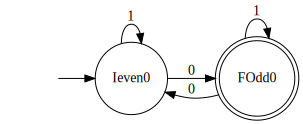

In [15]:
# DFA over {0,1} that accepts all strings that contain odd # of 0's

Odd_zeros = md2mc('''
DFA

Ieven0 : 0 -> FOdd0
Ieven0 : 1 -> Ieven0

FOdd0 : 0 -> Ieven0
FOdd0 : 1 -> FOdd0
''')

dotObj_dfa(Odd_zeros, FuseEdges=True)

Even 1's

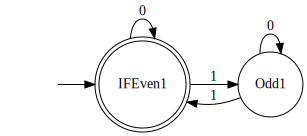

In [17]:
# DFA over {0,1} that accepts all strings that contain an even number of 1's

Even_ones = md2mc('''
DFA

IFEven1 : 0 -> IFEven1
IFEven1 : 1 -> Odd1

Odd1 : 0 -> Odd1
Odd1 : 1 -> IFEven1
''')

dotObj_dfa(Even_ones, FuseEdges=True)

Odd 0's OR even 1's

In [34]:
help(union_dfa)

Help on function union_dfa in module jove.Def_DFA:

union_dfa(D1in, D2in)
    In : D1in (consistent DFA)
         D2in (consistent DFA)
    Out: DFA for language union of D1in, D2in (consistent DFA).



In [35]:
help(dotObj_dfa)

Help on function dotObj_dfa in module jove.DotBashers:

dotObj_dfa(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D1 (DFA : partially consistent)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Suppress "black-hole states".



In [18]:
Odd0s_Even1s = union_dfa(Odd_zeros, Even_ones)

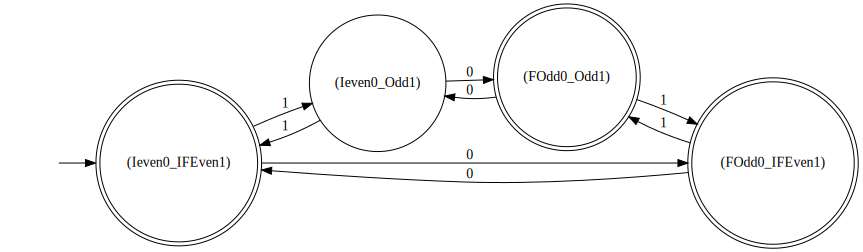

In [36]:
dotObj_dfa(Odd0s_Even1s)

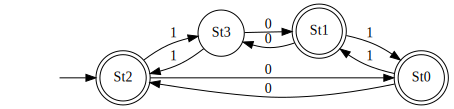

In [38]:
dotObj_dfa(Odd0s_Even1s, STATENAME_MAXSIZE=1)

# Mod-3 DFA, MSB-first

(But, does it matter whether MSB-first or LSB-first?)



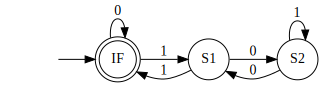

In [20]:
## KEEP DRAWING WHILE YOU FILL !!

DFA3 = md2mc('''DFA

IF : 0 -> IF
IF : 1 -> S1 

S1 : 0 -> S2
S1 : 1 -> IF

S2 : 0 -> S1
S2 : 1 -> S2


''')

dotObj_dfa(DFA3)

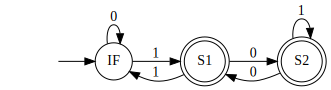

In [21]:
# MSB-first isn't divisible by 3

not_DFA3 = comp_dfa(DFA3)
dotObj_dfa(not_DFA3)

In [ ]:
Finally, (Odd0 or Even1) AND (not mod div by 3)

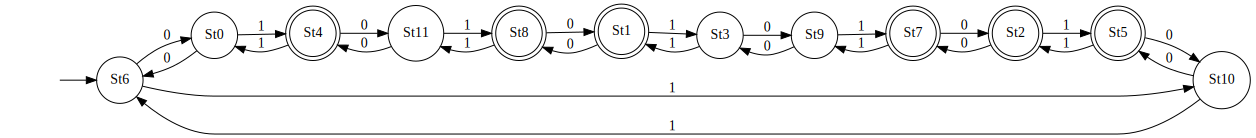

In [39]:
O0_or_E1_and_nm3 = intersect_dfa(Odd0s_Even1s, not_DFA3)
dotObj_dfa(O0_or_E1_and_nm3, STATENAME_MAXSIZE=1)

In [29]:
min_answer = min_dfa(O0_or_E1_and_nm3)

In [30]:
len(min_answer["Q"])

12

In [32]:
len(O0_or_E1_and_nm3["Q"])

12

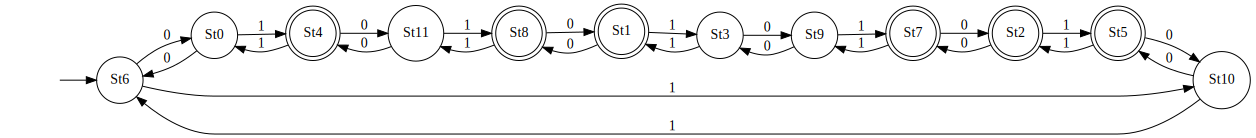

In [41]:
dotObj_dfa(min_answer, STATENAME_MAXSIZE=1)

# Even the min DFA can be large!

# Illustrate REs to generate test DFA

In [42]:
re2nfa('00*(0+1*)')

Generating LALR tables


{'Q': {'St1', 'St10', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7', 'St8', 'St9'},
 'Sigma': {'0', '1'},
 'Delta': {('St1', '0'): {'St2'},
  ('St5', ''): {'St10', 'St3', 'St6'},
  ('St3', '0'): {'St4'},
  ('St4', ''): {'St5'},
  ('St2', ''): {'St5'},
  ('St6', '0'): {'St7'},
  ('St10', ''): {'St8'},
  ('St8', '1'): {'St9'},
  ('St9', ''): {'St10'}},
 'Q0': {'St1'},
 'F': {'St10', 'St7'}}

In [43]:
nd = nfa2dfa(re2nfa('00*(0+1*)'))

Generating LALR tables


In [44]:
mnd = min_dfa(nd, state_name_mode='verbose')

In [45]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



In [46]:
len(nd["Q"])

5

In [47]:
len(mnd["Q"])

4

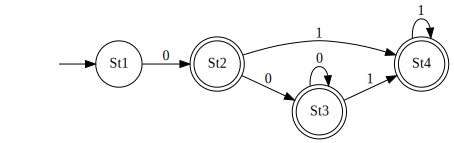

In [48]:
dotObj_dfa(nd, STATENAME_MAXSIZE=40)

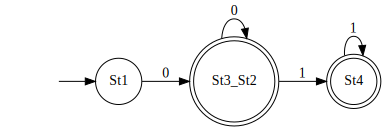

In [49]:
dotObj_dfa(mnd)